## Loads Profiles

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from pydae.svg_tools import svg
from IPython.core.display import HTML,SVG
import pydae.plot_tools as pplt


colors = pplt.set_style(plt)

In [11]:
import cigre_eu_lv_acdc_tools as tools

In [16]:
params = {}
excel_file = './cigre_lv.xlsx'

cases = []

for case_name in ['Case 0','Case 1','Case 2','Case 3']:
    case = tools.loads()
    case.params = {}
    case.case = case_name
    case.read(excel_file)
    times = np.arange(0,25*3600,1*3600)
    case.report_profiles(times)

    for area in ['res','ind','com']:
        case.profiles[area]['s_load_ac'] =  case.profiles[area]['p_load_ac'] + 1j*case.profiles[area]['q_load_ac']
        case.profiles[area]['s_chargers_ac'] =  case.profiles[area]['p_charger_ac'] + 1j*case.profiles[area]['q_charger_ac']
        case.profiles[area]['s_total_ac'] =  case.profiles[area]['s_load_ac'] + case.profiles[area]['s_chargers_ac']
        case.profiles[area]['s_load_dc'] =  case.profiles[area]['p_load_dc']  
        case.profiles[area]['s_chargers_dc'] =  case.profiles[area]['p_charger_dc']  
        case.profiles[area]['s_total_dc'] =  case.profiles[area]['s_load_dc'] + case.profiles[area]['s_chargers_dc']

    cases += [case]

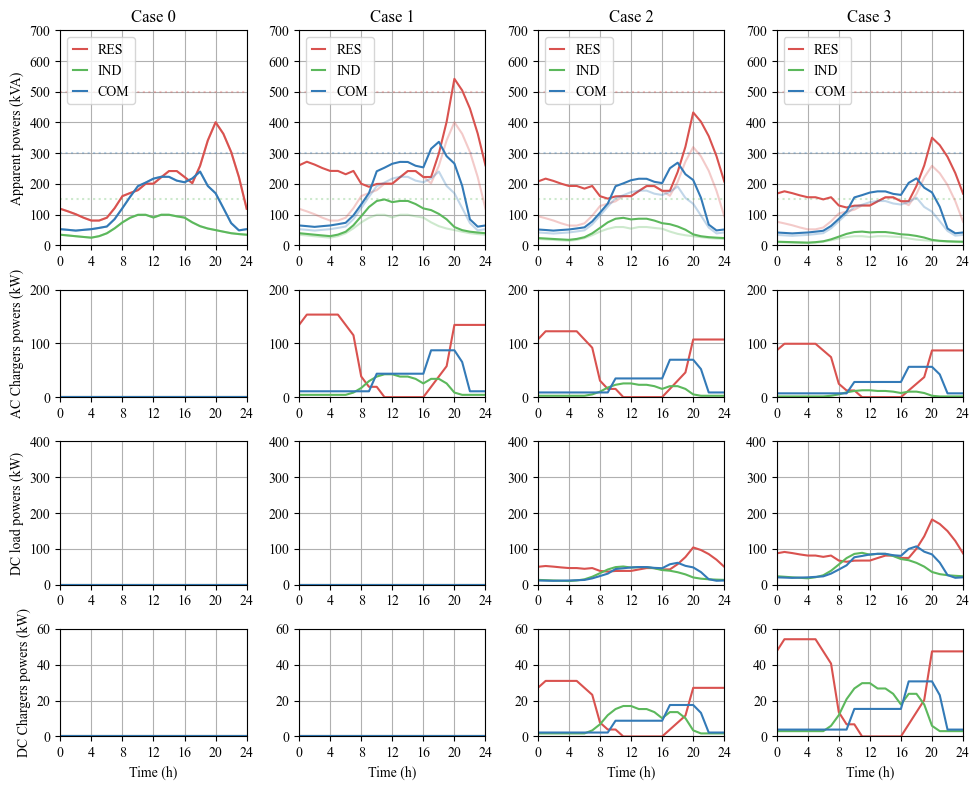

In [17]:


fig, axes = plt.subplots(nrows=4,ncols=4, figsize=(3.3*3, 8.0), gridspec_kw={'height_ratios': [3, 1.5, 2, 1.5]},dpi=100)



for ic,case_name in enumerate(['Case 0','Case 1','Case 2','Case 3']) :
    axes[0,ic].plot([0,25], [500]*2,':',color=colors[0],alpha=0.3)
    axes[0,ic].plot([0,25], [150]*2,':',color=colors[1],alpha=0.3)
    axes[0,ic].plot([0,25], [300]*2,':',color=colors[2],alpha=0.3)
    
    for il, area in enumerate(['res','ind','com']):
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3,color=colors[il], label=area.upper())
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3,color=colors[il], alpha=0.3)
        axes[1,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3,color=colors[il], label=area.upper())
        axes[2,ic].plot(times/3600, cases[ic].profiles[area]['s_total_dc'].real/1e3,color=colors[il], label=area.upper())
        axes[3,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_dc'].real/1e3,color=colors[il], label=area.upper())

    if ic == 0:
        axes[0,ic].set_ylabel('Apparent powers (kVA)')
        axes[1,ic].set_ylabel('AC Chargers powers (kW)')
        axes[2,ic].set_ylabel('DC load powers (kW)')
        axes[3,ic].set_ylabel('DC Chargers powers (kW)')

    axes[3,ic].set_xlabel('Time (h)')
    
    axes[0,ic].set_ylim([0,700])
    axes[1,ic].set_ylim([0,200])  
    axes[2,ic].set_ylim([0,400])    
    axes[3,ic].set_ylim([0,60])    

    axes[0,ic].legend(loc='upper left')
    axes[0,ic].set_xticks([0,4,8,12,16,20,24])
    axes[1,ic].set_xticks([0,4,8,12,16,20,24])
    axes[2,ic].set_xticks([0,4,8,12,16,20,24])
    axes[3,ic].set_xticks([0,4,8,12,16,20,24])
    
    for ax in axes[:,ic]:
        ax.grid()
        ax.set_xlim([0,24])
        
axes[0,0].set_title('Case 0')
axes[0,1].set_title('Case 1')
axes[0,2].set_title('Case 2')
axes[0,3].set_title('Case 3')

fig.tight_layout()
fig.savefig('loads_powers.pdf')
#fig.savefig('loads_powers.png', dpi=300)

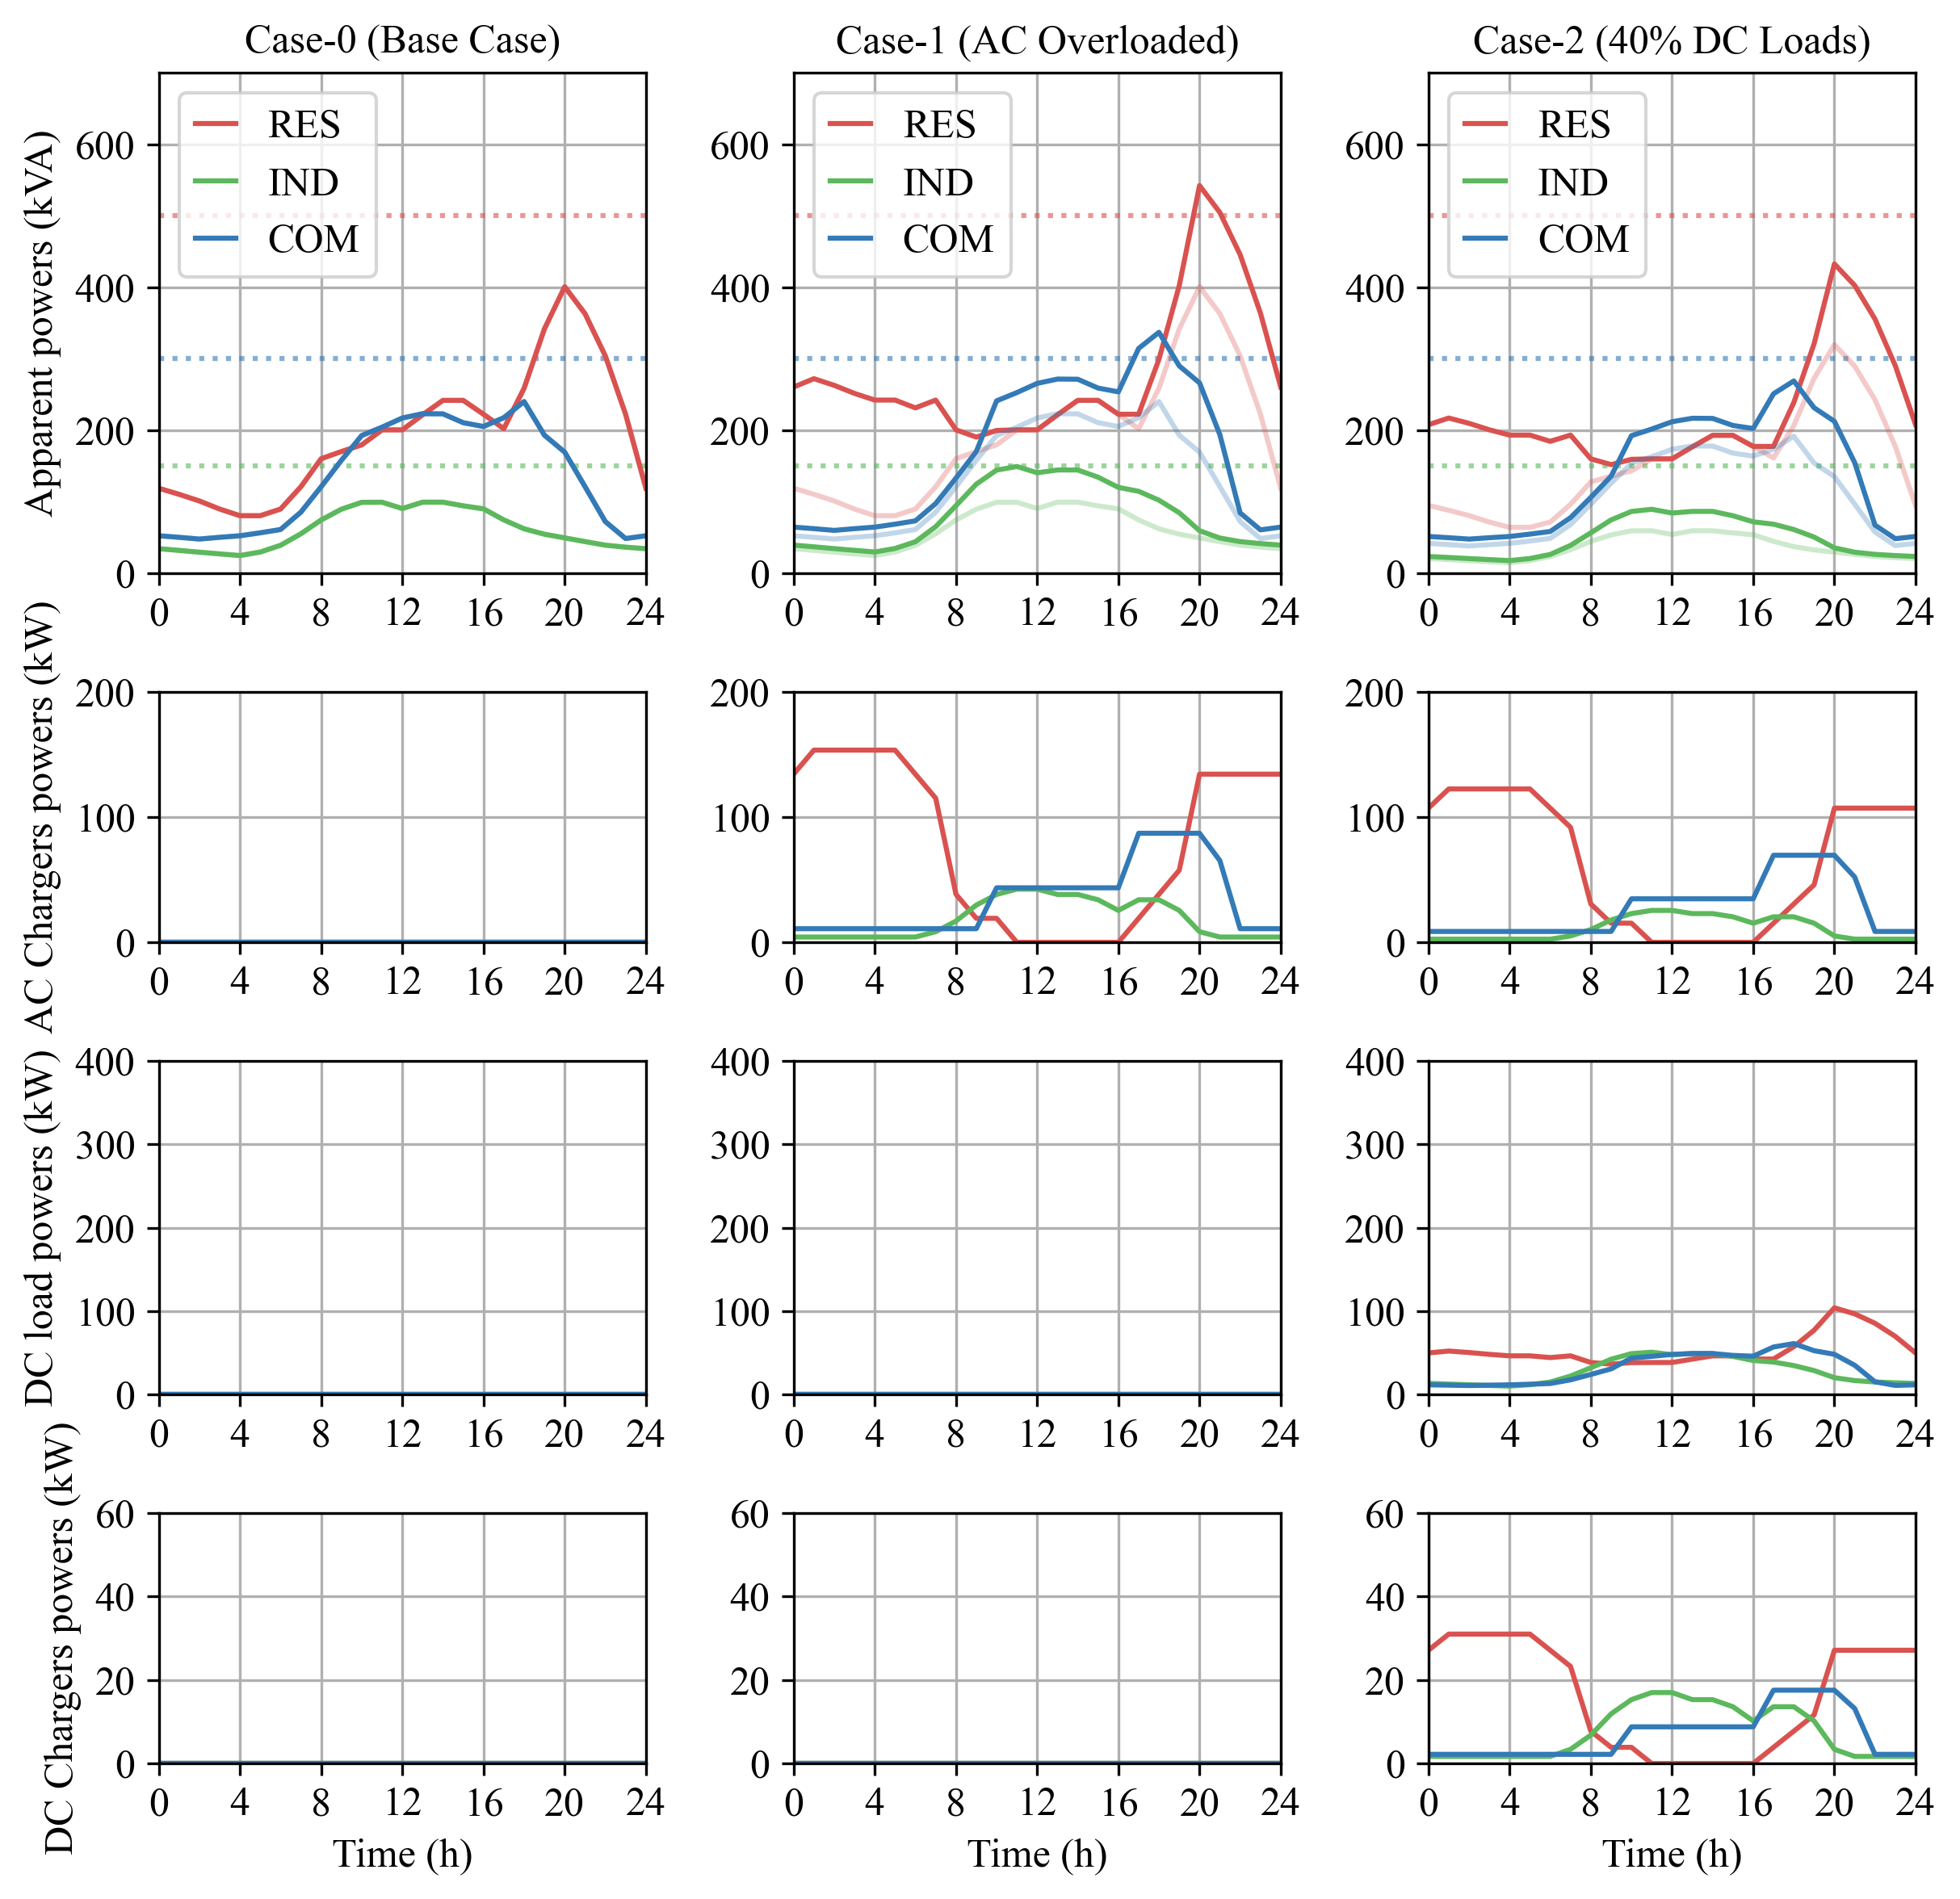

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(3.3*2.5, 8.0), 
                        gridspec_kw={'height_ratios': [3, 1.5, 2, 1.5]}, dpi=300)

for ic, case_name in enumerate(['Case 0', 'Case 1', 'Case 2']):  # Removed 'Case 3'
    axes[0,ic].plot([0,25], [500]*2, ':', color=colors[0], alpha=0.6)
    axes[0,ic].plot([0,25], [150]*2, ':', color=colors[1], alpha=0.6)
    axes[0,ic].plot([0,25], [300]*2, ':', color=colors[2], alpha=0.6)
    
    for il, area in enumerate(['res','ind','com']):
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3, color=colors[il], label=area.upper())
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3, color=colors[il], alpha=0.3)
        axes[1,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3, color=colors[il], label=area.upper())
        axes[2,ic].plot(times/3600, cases[ic].profiles[area]['s_total_dc'].real/1e3, color=colors[il], label=area.upper())
        axes[3,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_dc'].real/1e3, color=colors[il], label=area.upper())

    if ic == 0:
        axes[0,ic].set_ylabel('Apparent powers (kVA)')
        axes[1,ic].set_ylabel('AC Chargers powers (kW)')
        axes[2,ic].set_ylabel('DC load powers (kW)')
        axes[3,ic].set_ylabel('DC Chargers powers (kW)')

    axes[3,ic].set_xlabel('Time (h)')
    
    axes[0,ic].set_ylim([0,700])
    axes[1,ic].set_ylim([0,200])  
    axes[2,ic].set_ylim([0,400])    
    axes[3,ic].set_ylim([0,60])    

    axes[0,ic].legend(loc='upper left')
    axes[0,ic].set_xticks([0,4,8,12,16,20,24])
    axes[1,ic].set_xticks([0,4,8,12,16,20,24])
    axes[2,ic].set_xticks([0,4,8,12,16,20,24])
    axes[3,ic].set_xticks([0,4,8,12,16,20,24])
    
    for ax in axes[:,ic]:
        ax.grid()
        ax.set_xlim([0,24])
        
axes[0,0].set_title('Case-0 (Base Case)')
axes[0,1].set_title('Case-1 (AC Overloaded)')
axes[0,2].set_title('Case-2 (40% DC Loads)')

fig.tight_layout()
fig.savefig('loads_powers.pdf')
fig.savefig('loads_powers.png', dpi=300)

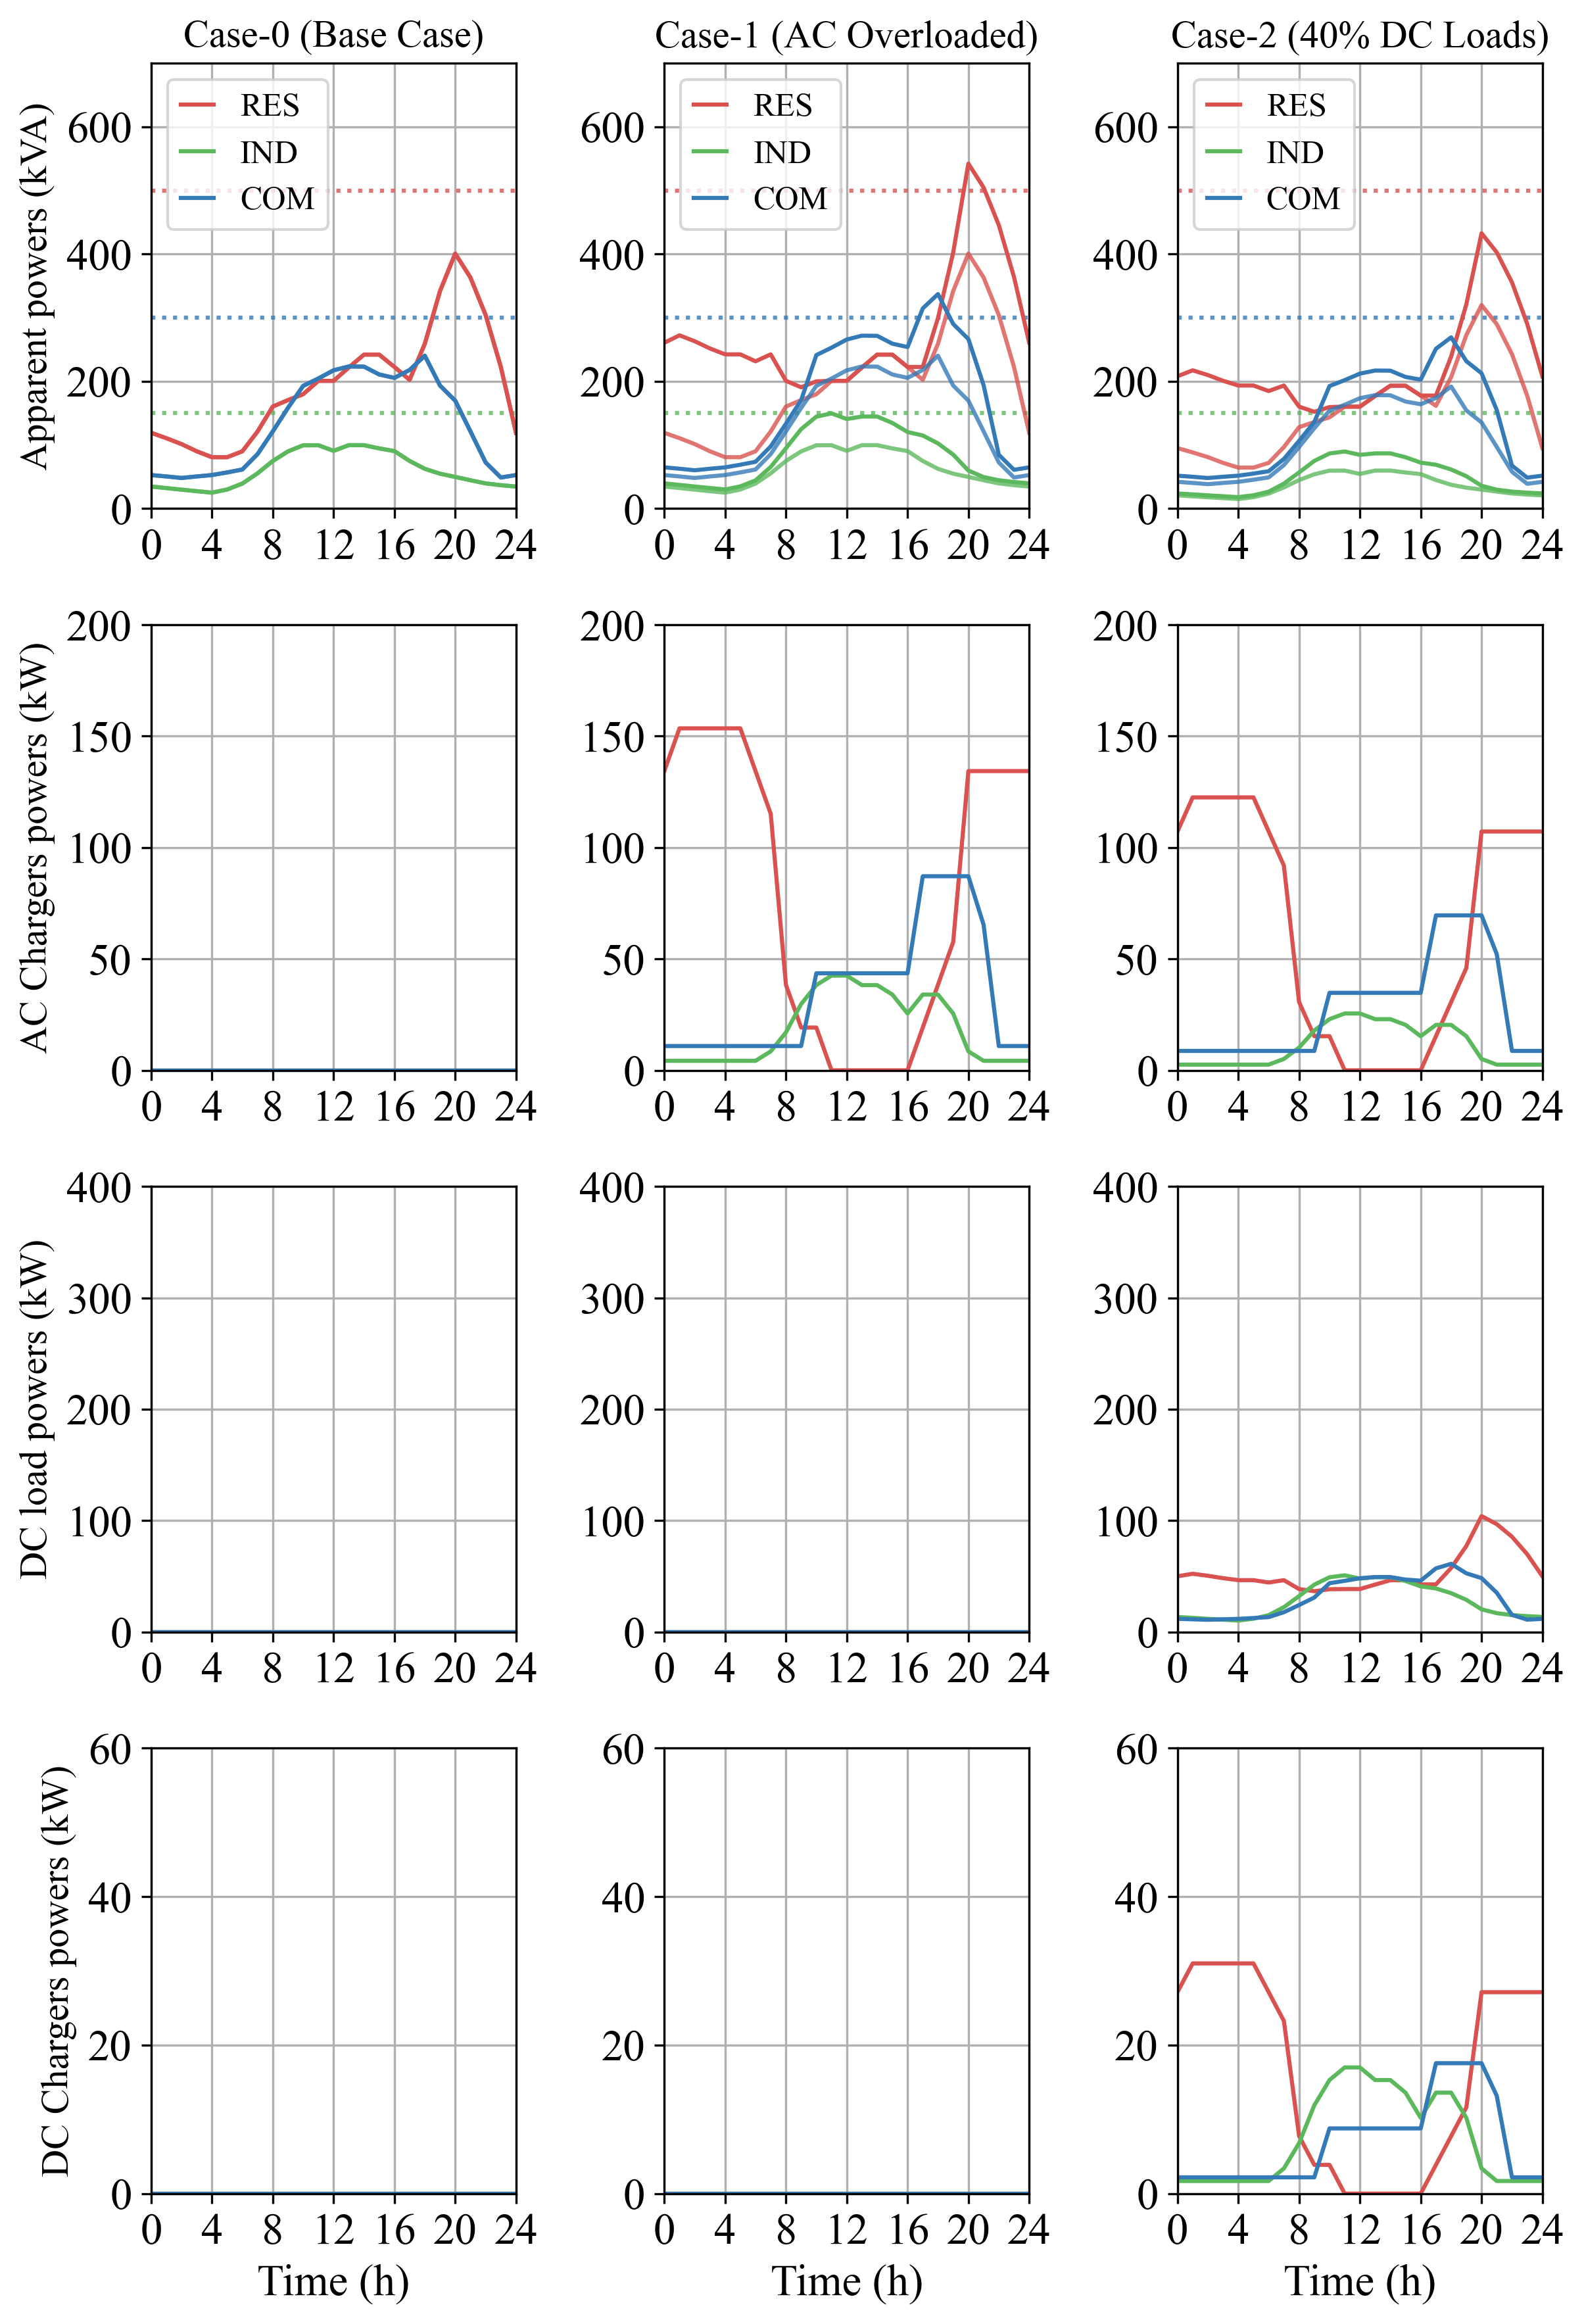

In [33]:
# Set font sizes
plt.rcParams.update({
    'font.size': 14,           # Default font size
    'axes.titlesize': 14,      # Title font size
    'axes.labelsize': 16,      # Axis label font size
    'xtick.labelsize': 16,      # X-axis tick label size
    'ytick.labelsize': 16,      # Y-axis tick label size
    'legend.fontsize': 14       # Legend font size
})

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(3.3*2.5, 12.0), 
                        gridspec_kw={'height_ratios': [1.5, 1.5, 1.5, 1.5]}, dpi=300)

for ic, case_name in enumerate(['Case 0', 'Case 1', 'Case 2']):
    axes[0,ic].plot([0,25], [500]*2, ':', color=colors[0], alpha=0.8)
    axes[0,ic].plot([0,25], [150]*2, ':', color=colors[1], alpha=0.8)
    axes[0,ic].plot([0,25], [300]*2, ':', color=colors[2], alpha=0.8)
    
    for il, area in enumerate(['res','ind','com']):
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3, color=colors[il], label=area.upper())
        axes[0,ic].plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3, color=colors[il], alpha=0.8)
        axes[1,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3, color=colors[il], label=area.upper())
        axes[2,ic].plot(times/3600, cases[ic].profiles[area]['s_total_dc'].real/1e3, color=colors[il], label=area.upper())
        axes[3,ic].plot(times/3600, cases[ic].profiles[area]['s_chargers_dc'].real/1e3, color=colors[il], label=area.upper())

    if ic == 0:
        axes[0,ic].set_ylabel('Apparent powers (kVA)', fontsize=14)
        axes[1,ic].set_ylabel('AC Chargers powers (kW)', fontsize=14)
        axes[2,ic].set_ylabel('DC load powers (kW)', fontsize=14)
        axes[3,ic].set_ylabel('DC Chargers powers (kW)', fontsize=14)

    axes[3,ic].set_xlabel('Time (h)', fontsize=16)
    
    axes[0,ic].set_ylim([0,700])
    axes[1,ic].set_ylim([0,200])  
    axes[2,ic].set_ylim([0,400])    
    axes[3,ic].set_ylim([0,60])    

    axes[0,ic].legend(loc='upper left', fontsize=12)
    axes[0,ic].set_xticks([0,4,8,12,16,20,24])
    axes[1,ic].set_xticks([0,4,8,12,16,20,24])
    axes[2,ic].set_xticks([0,4,8,12,16,20,24])
    axes[3,ic].set_xticks([0,4,8,12,16,20,24])
    
    for ax in axes[:,ic]:
        ax.grid()
        ax.set_xlim([0,24])
        ax.tick_params(axis='both', which='major', labelsize=16)
        
axes[0,0].set_title('Case-0 (Base Case)', fontsize=14)
axes[0,1].set_title('Case-1 (AC Overloaded)', fontsize=14)
axes[0,2].set_title('Case-2 (40% DC Loads)', fontsize=14)

fig.tight_layout()
fig.savefig('loads_powers.pdf')
fig.savefig('loads_powers.png', dpi=300)

In [ ]:
## END the next cells for paper (Adv. Appl. Energy - Topologies for CIGRE - ElseArticle)

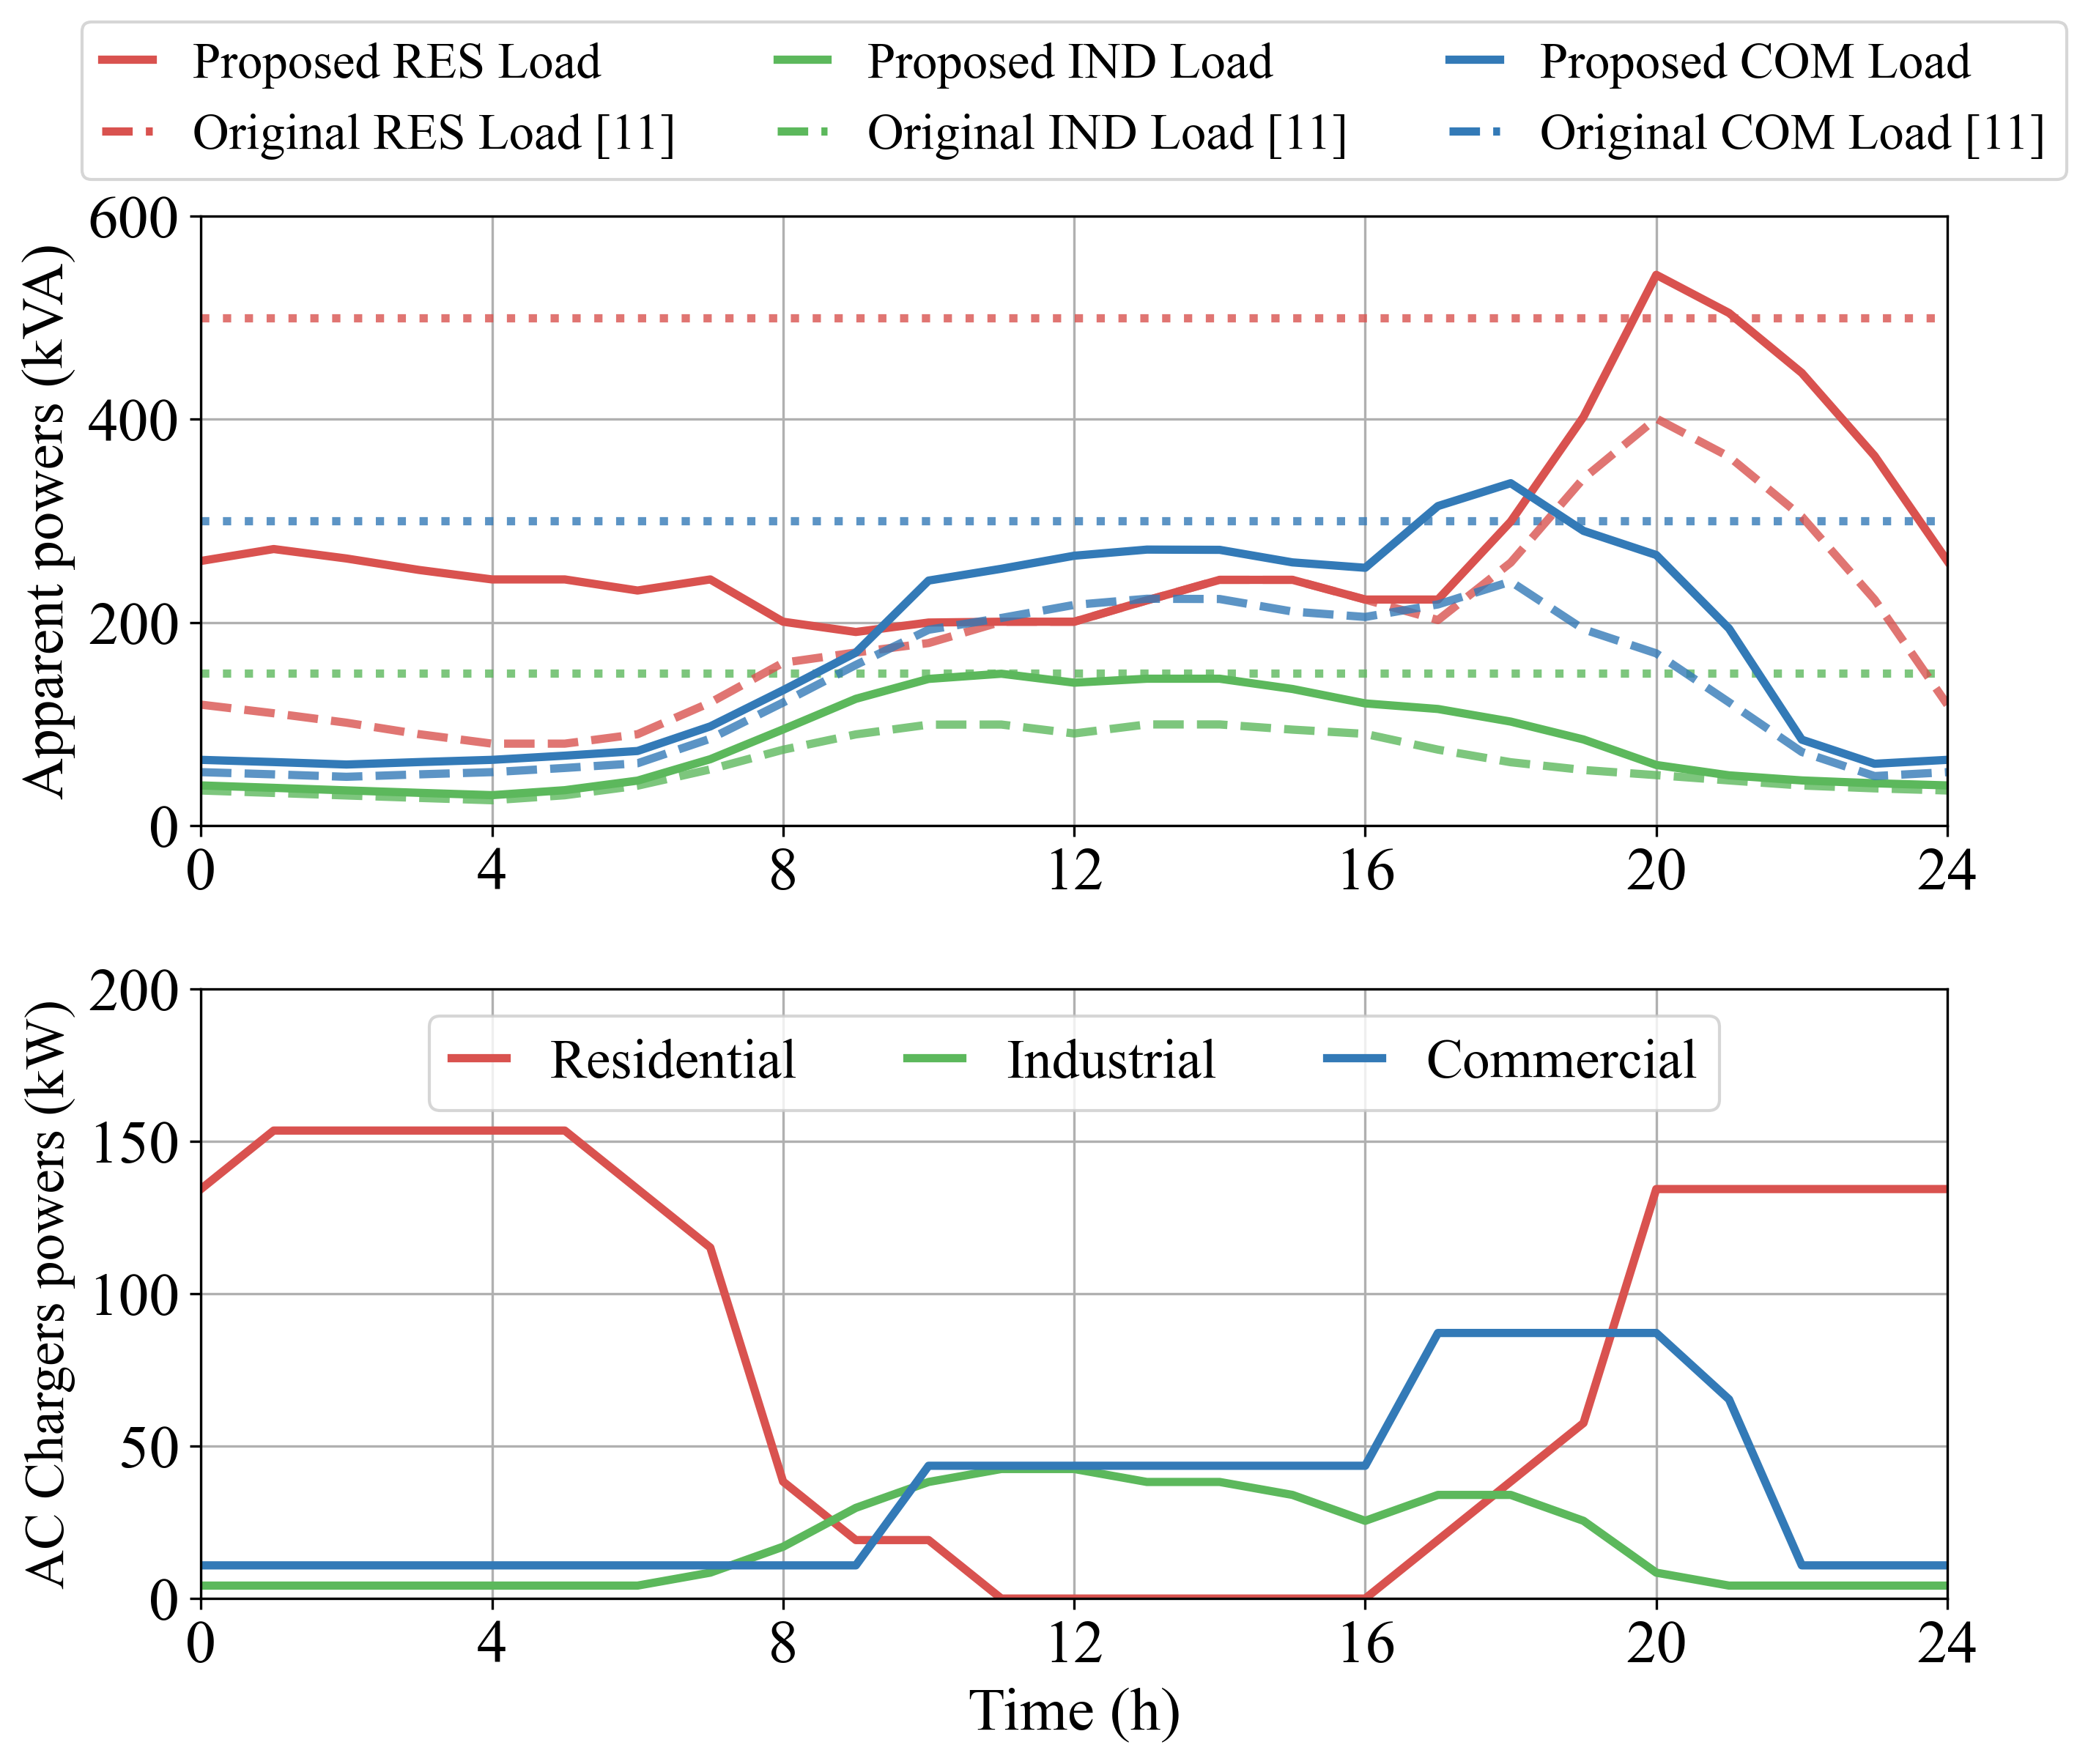

In [54]:
# Set font sizes (same as above)
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18  # Slightly smaller for compact layout
})

# Create two subplots for Case 1
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8.5), dpi=300)

ic = 1  # Case 1

# First plot - Apparent Powers
# Plot reference lines without labels.
ax1.plot([0,25], [500]*2, ':', color=colors[0], alpha=0.8, linewidth=2.7)
ax1.plot([0,25], [150]*2, ':', color=colors[1], alpha=0.8, linewidth=2.7)
ax1.plot([0,25], [300]*2, ':', color=colors[2], alpha=0.8, linewidth=2.7)

for il, area in enumerate(['res','ind','com']):
    # Plot total power with solid line
    ax1.plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3, 
             color=colors[il], linewidth=2.7)
    # Plot load power with dashed line
    ax1.plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3, 
             color=colors[il], alpha=0.8, linestyle='--', linewidth=2.7)

ax1.set_ylabel('Apparent powers (kVA)', fontsize=19)
ax1.set_ylim([0,600])
#ax1.set_title('Case-1 (AC Overloaded)', fontsize=16)
ax1.grid()

# Create custom legend for the first plot - combine all elements
from matplotlib.lines import Line2D
all_legend_elements = [
    #Line2D([0], [0], color=colors[0], linestyle=':', label='500 kVA ref'),
    #Line2D([0], [0], color=colors[1], linestyle=':', label='150 kVA ref'),
    #Line2D([0], [0], color=colors[2], linestyle=':', label='300 kVA ref'),
    Line2D([0], [0], color=colors[0], linestyle='-', label='Proposed RES Load', linewidth=2.7),
    Line2D([0], [0], color=colors[0], linestyle='--', label='Original RES Load [11]', linewidth=2.7),
    Line2D([0], [0], color=colors[1], linestyle='-', label='Proposed IND Load', linewidth=2.7),
    Line2D([0], [0], color=colors[1], linestyle='--', label='Original IND Load [11]', linewidth=2.7),
    Line2D([0], [0], color=colors[2], linestyle='-', label='Proposed COM Load', linewidth=2.7),
    Line2D([0], [0], color=colors[2], linestyle='--', label='Original COM Load [11]', linewidth=2.7)
]

# Place all legend items at the top in a horizontal layout
ax1.legend(handles=all_legend_elements, loc='upper center', 
           bbox_to_anchor=(0.5, 1.36), ncol=3, fontsize=16.5)

# Second plot - AC Chargers
for il, area in enumerate(['res','ind','com']):
    ax2.plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3, 
             color=colors[il], linewidth=2.7)

ax2.set_ylabel('AC Chargers powers (kW)', fontsize=18)
ax2.set_xlabel('Time (h)', fontsize=20)
ax2.set_ylim([0,200])
ax2.grid()

# Create custom legend for the second plot
legend_elements2 = [
    Line2D([0], [0], color=colors[0], linestyle='-', label='Residential', linewidth=2.7),
    Line2D([0], [0], color=colors[1], linestyle='-', label='Industrial', linewidth=2.7),
    Line2D([0], [0], color=colors[2], linestyle='-', label='Commercial', linewidth=2.7)
]
ax2.legend(handles=legend_elements2, loc='upper center', fontsize=18, ncol=3)

# Common settings for both plots
for ax in [ax1, ax2]:
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xlim([0,24])
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig('AC_Overloaded.pdf')
#plt.savefig('case1_apparent_and_chargers.png', dpi=300)
plt.show()

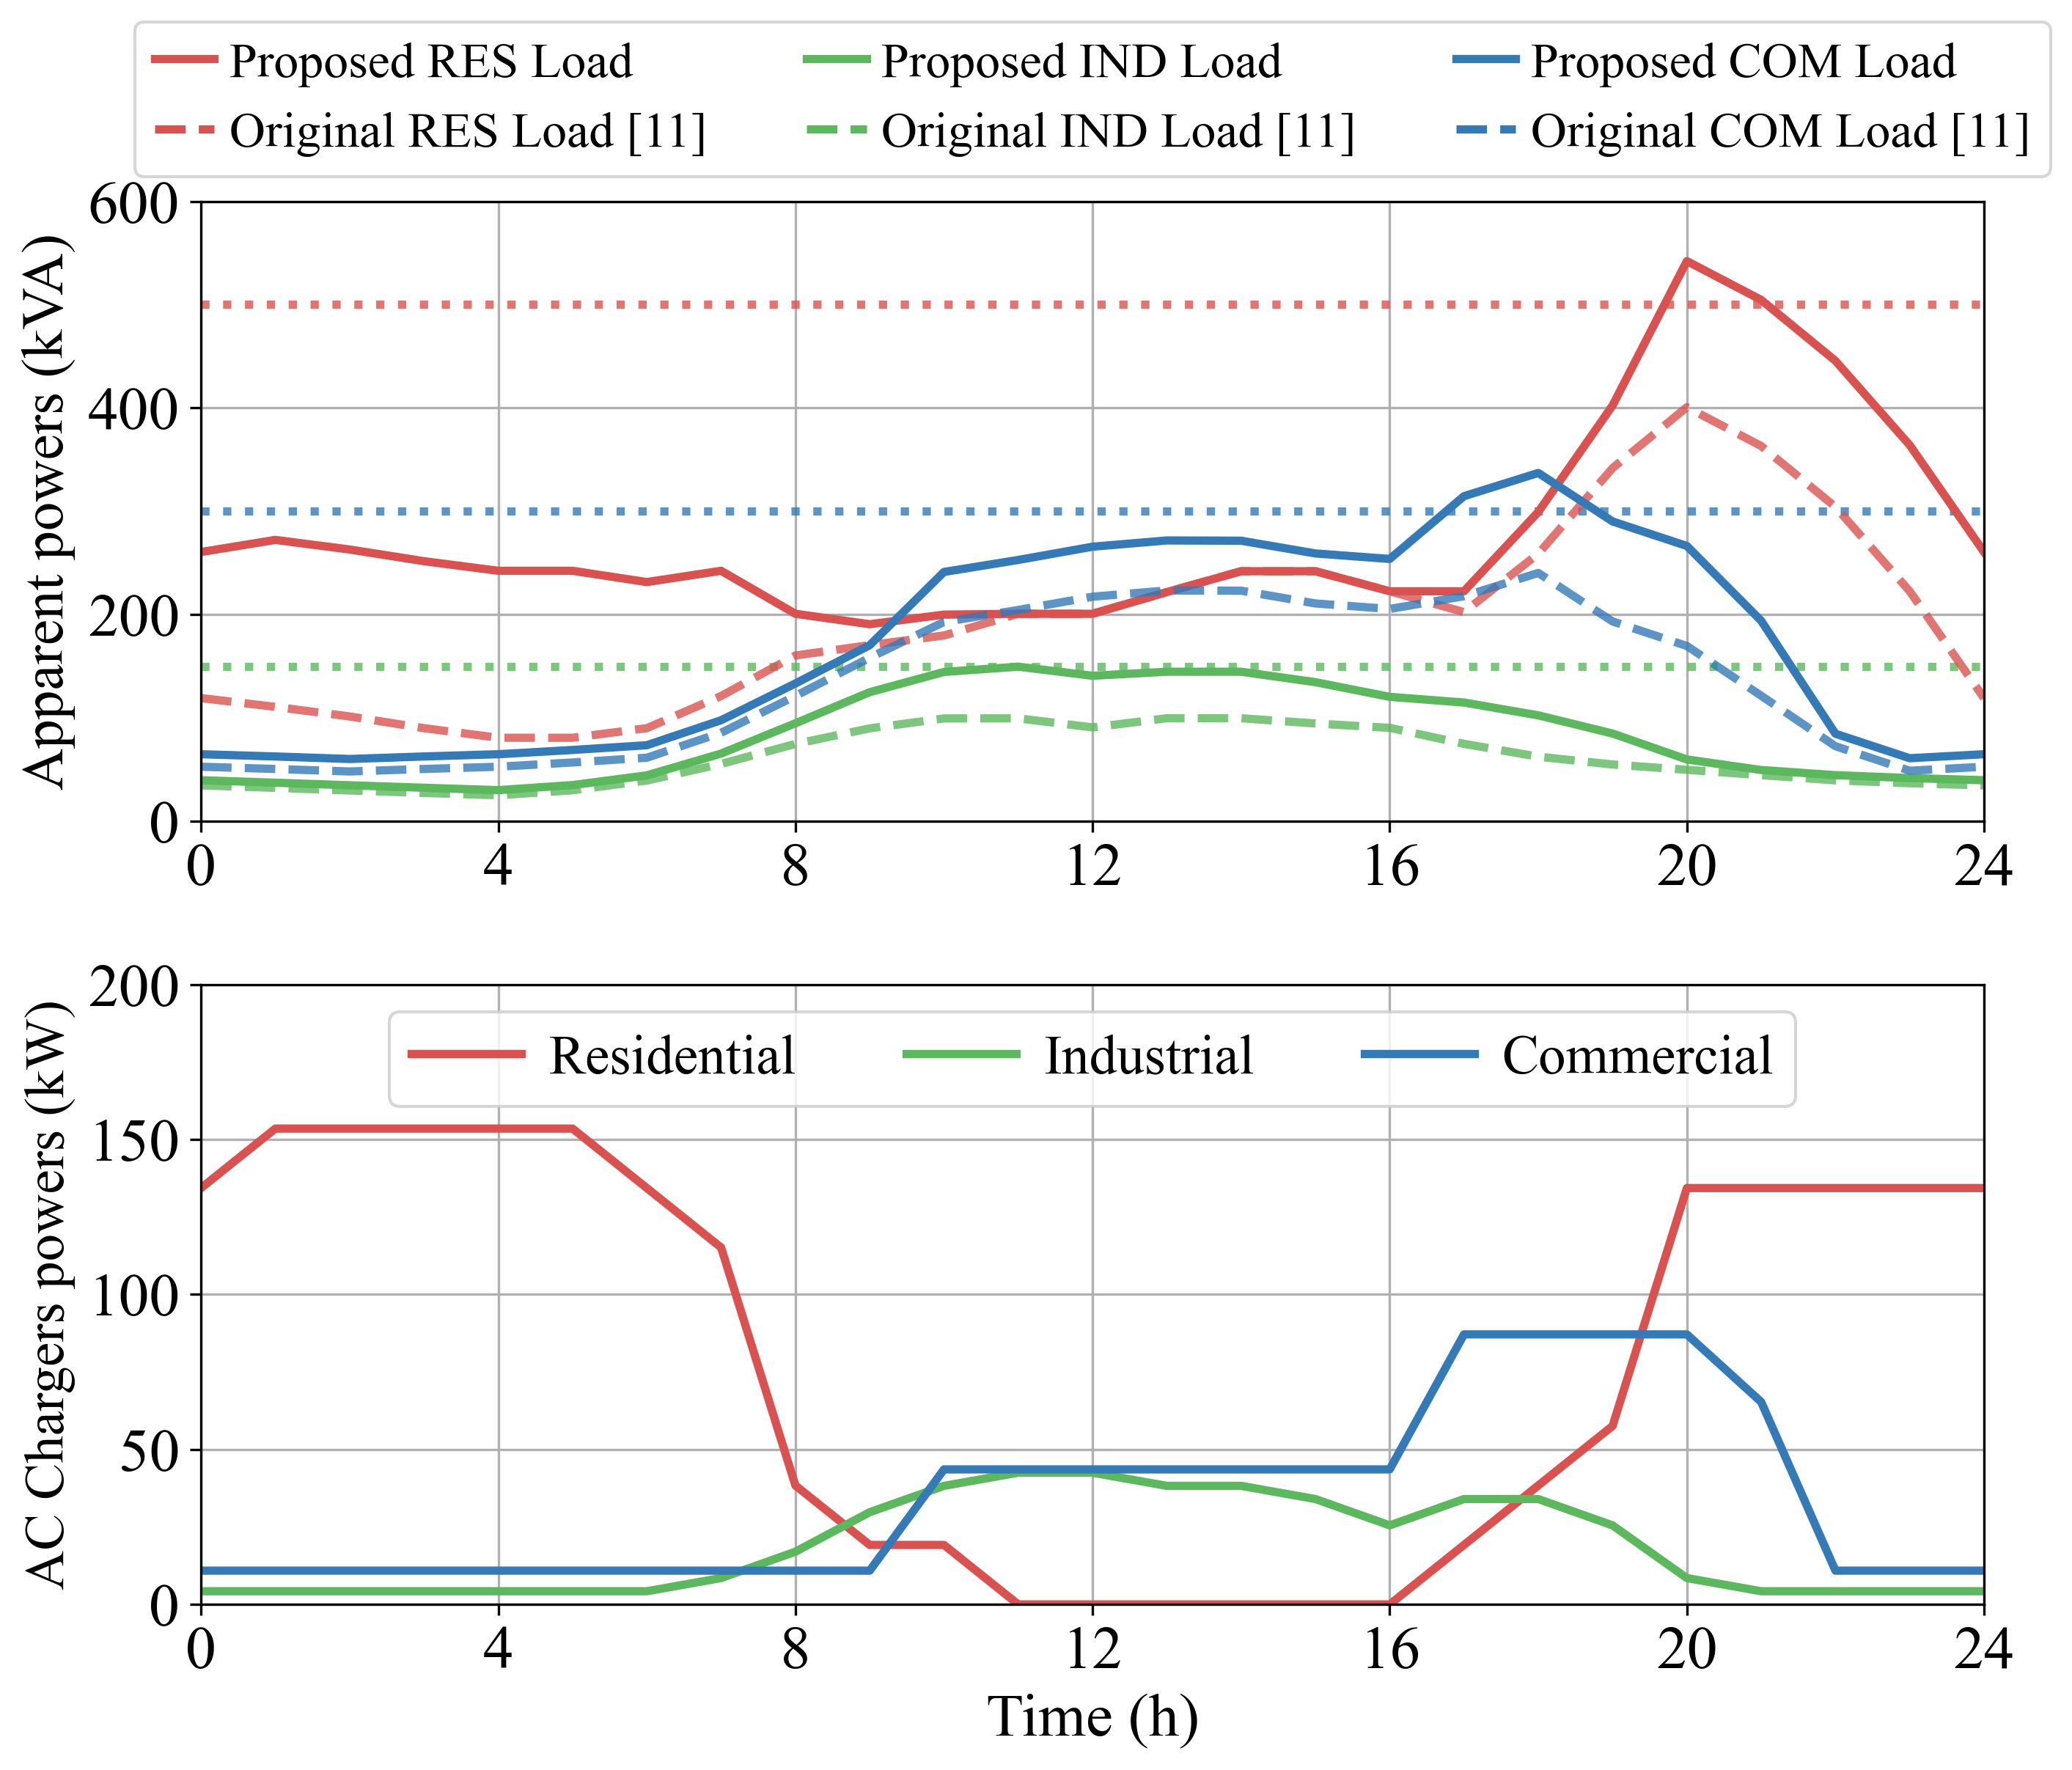

In [82]:
# Set font sizes (same as above)
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18  # Slightly smaller for compact layout
})

# Create two subplots for Case 1
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8.5), dpi=300)

ic = 1  # Case 1

# First plot - Apparent Powers
# Plot reference lines without labels.
ax1.plot([0,25], [500]*2, ':', color=colors[0], alpha=0.8, linewidth=2.7)
ax1.plot([0,25], [150]*2, ':', color=colors[1], alpha=0.8, linewidth=2.7)
ax1.plot([0,25], [300]*2, ':', color=colors[2], alpha=0.8, linewidth=2.7)

for il, area in enumerate(['res','ind','com']):
    # Plot total power with solid line
    ax1.plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3, 
             color=colors[il], linewidth=2.7)
    # Plot load power with dashed line
    ax1.plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3, 
             color=colors[il], alpha=0.8, linestyle='--', linewidth=2.7)

ax1.set_ylabel('Apparent powers (kVA)', fontsize=19)
ax1.set_ylim([0,600])
ax1.grid()

# Create custom legend for the first plot - combine all elements
from matplotlib.lines import Line2D
all_legend_elements = [
    Line2D([0], [0], color=colors[0], linestyle='-', label='Proposed RES Load', linewidth=2.7),
    Line2D([0], [0], color=colors[0], linestyle='--', label='Original RES Load [11]', linewidth=2.7),
    Line2D([0], [0], color=colors[1], linestyle='-', label='Proposed IND Load', linewidth=2.7),
    Line2D([0], [0], color=colors[1], linestyle='--', label='Original IND Load [11]', linewidth=2.7),
    Line2D([0], [0], color=colors[2], linestyle='-', label='Proposed COM Load', linewidth=2.7),
    Line2D([0], [0], color=colors[2], linestyle='--', label='Original COM Load [11]', linewidth=2.7)
]

# Place all legend items at the top in a horizontal layout
ax1.legend(
    handles=all_legend_elements, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.33), 
    ncol=3, 
    fontsize=16.3,
    handletextpad=0.3,   # increase space between line and text
    handlelength=1.2     # make the line indicator a bit longer
)

# Second plot - AC Chargers
for il, area in enumerate(['res','ind','com']):
    ax2.plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3, 
             color=colors[il], linewidth=2.7)

ax2.set_ylabel('AC Chargers powers (kW)', fontsize=18)
ax2.set_xlabel('Time (h)', fontsize=20)
ax2.set_ylim([0,200])
ax2.grid()

# Create custom legend for the second plot
legend_elements2 = [
    Line2D([0], [0], color=colors[0], linestyle='-', label='Residential', linewidth=2.7),
    Line2D([0], [0], color=colors[1], linestyle='-', label='Industrial', linewidth=2.7),
    Line2D([0], [0], color=colors[2], linestyle='-', label='Commercial', linewidth=2.7)
]

ax2.legend(
    handles=legend_elements2, 
    loc='upper center', 
    fontsize=18, 
    ncol=3,
    handletextpad=0.5,   # increase space between line and text
    handlelength=2.0     # make the line indicator longer
)

# Common settings for both plots
for ax in [ax1, ax2]:
    ax.set_xticks([0,4,8,12,16,20,24])
    ax.set_xlim([0,24])
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.savefig('AC_Overloaded.pdf')
plt.show()


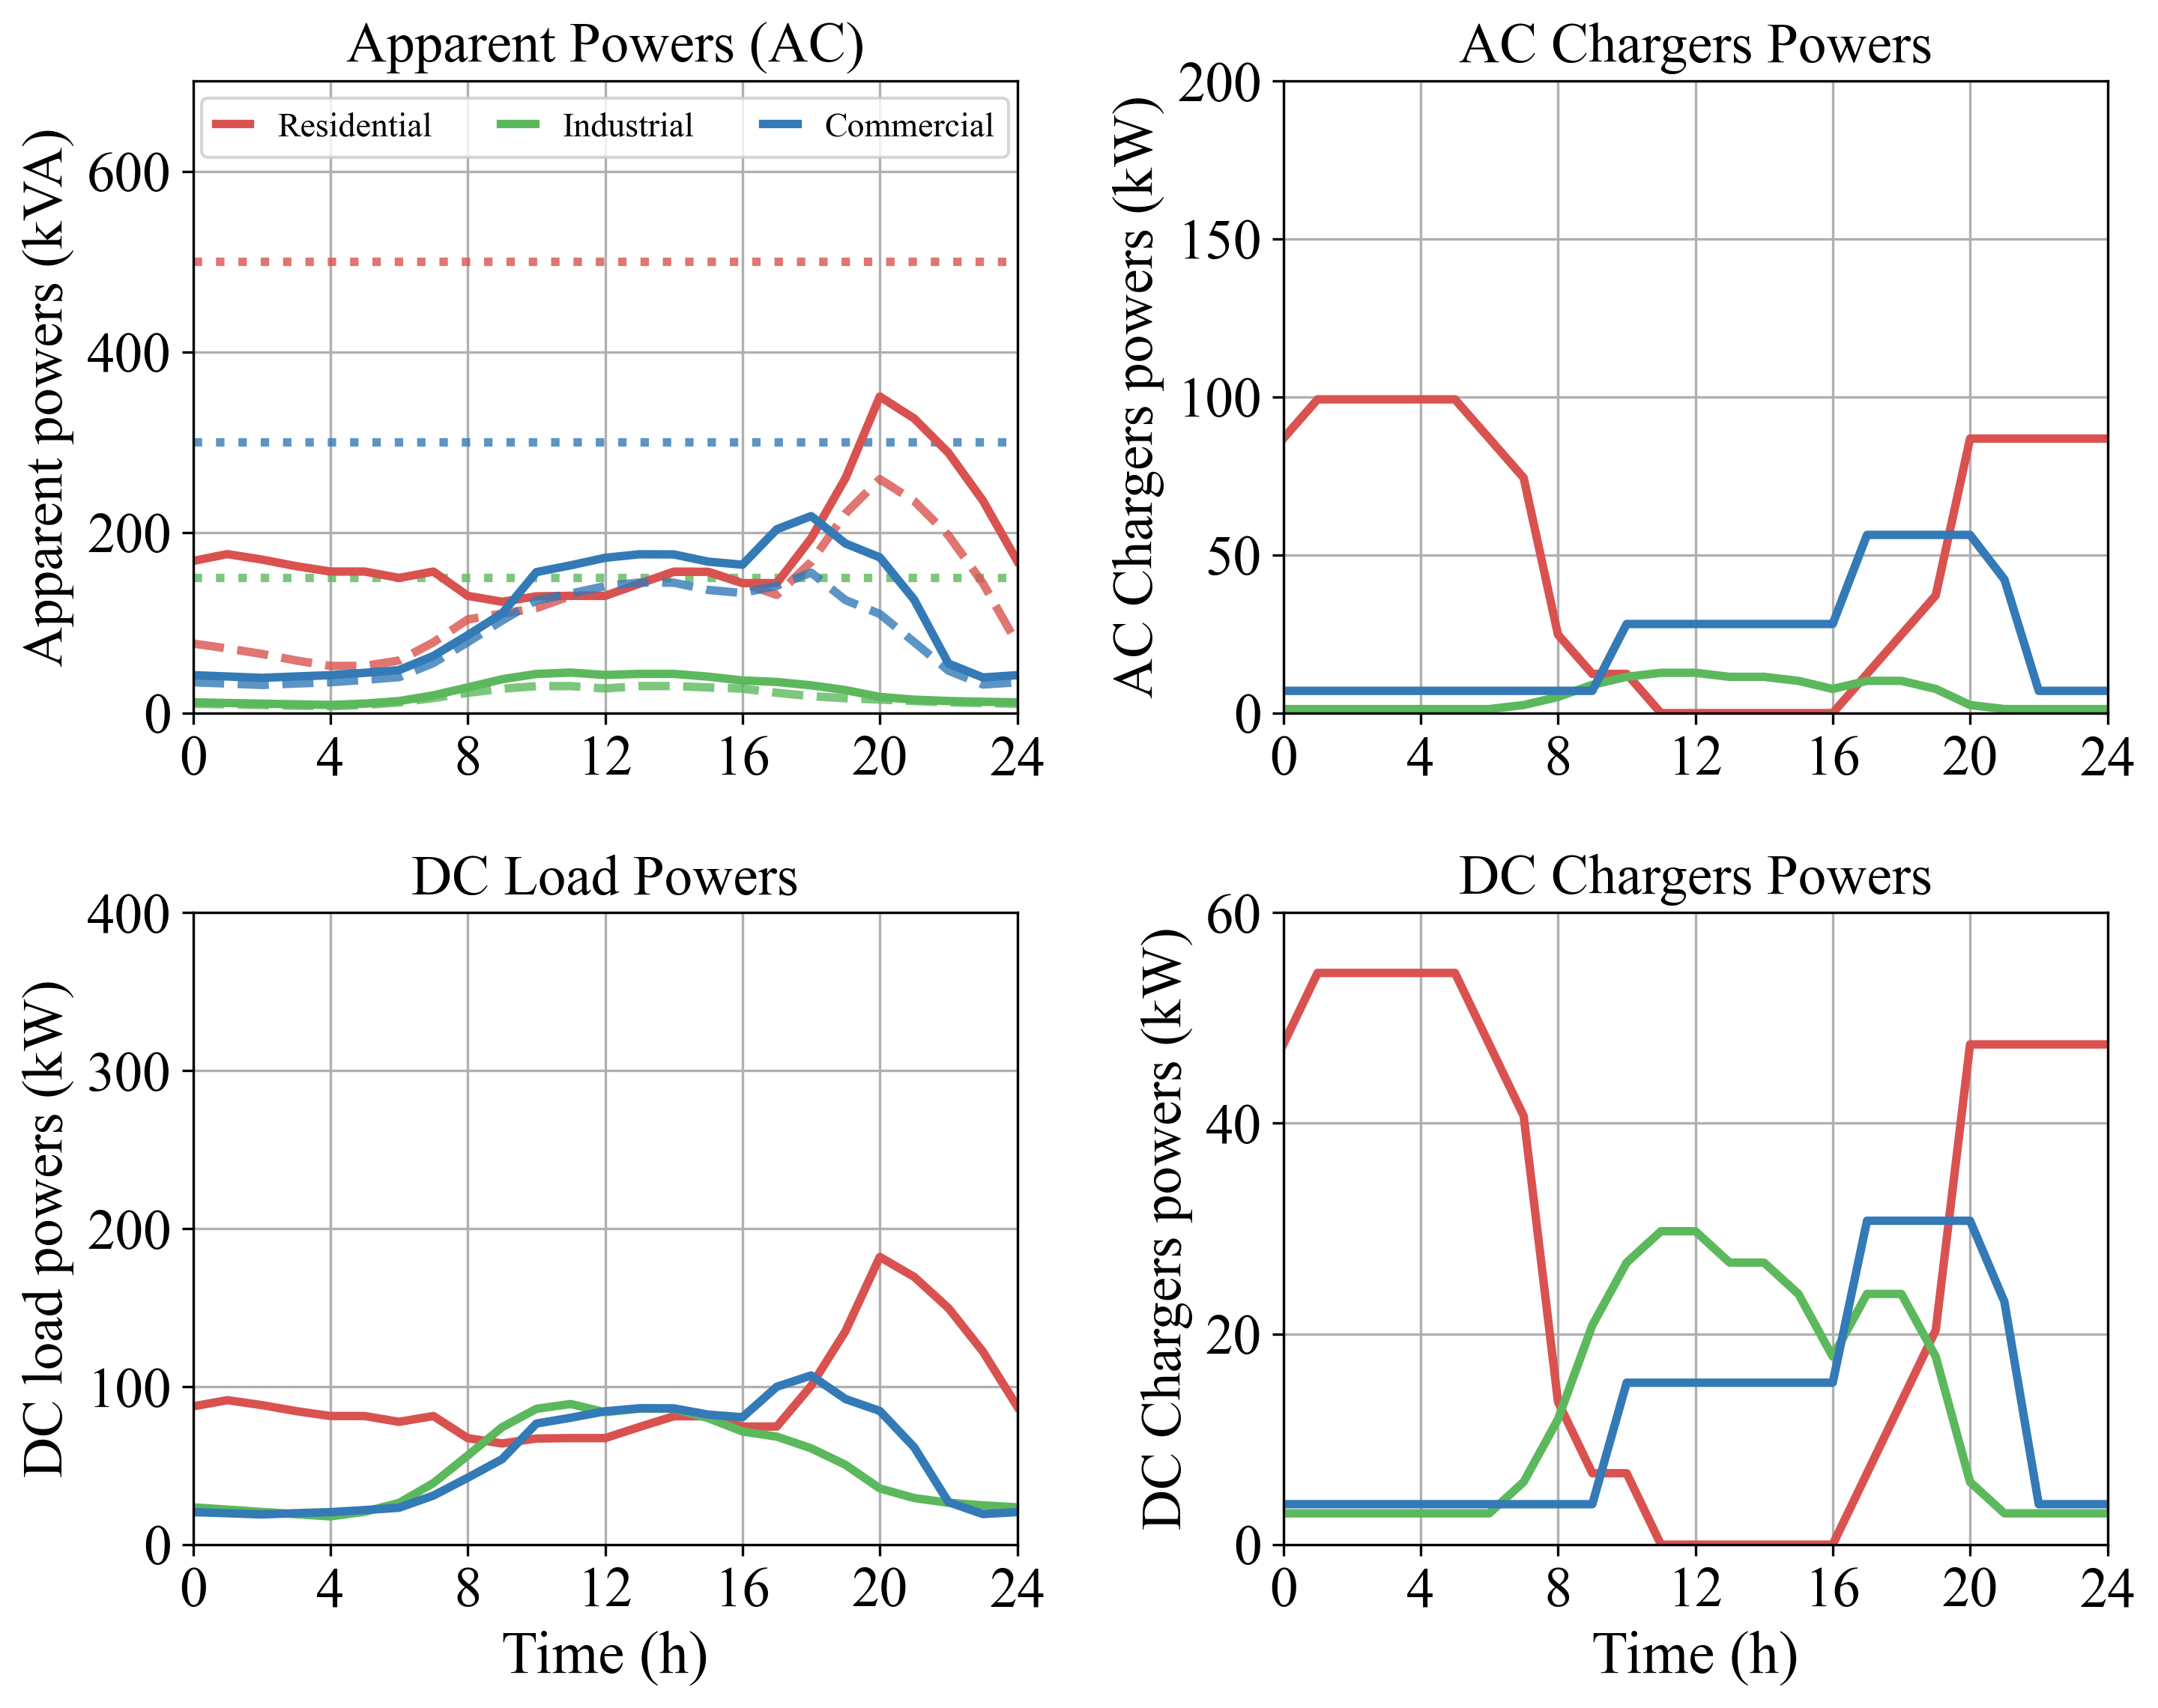

In [76]:
# Set font sizes
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18
})

# Create 2x2 subplots for Case 3
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=300)

ic = 3  # Case 3

# Plot reference lines for the first subplot (top left)
axes[0, 0].plot([0,25], [500]*2, ':', color=colors[0], alpha=0.8, linewidth=2.7)
axes[0, 0].plot([0,25], [150]*2, ':', color=colors[1], alpha=0.8, linewidth=2.7)
axes[0, 0].plot([0,25], [300]*2, ':', color=colors[2], alpha=0.8, linewidth=2.7)

for il, area in enumerate(['res','ind','com']):
    # Top left: Apparent powers
    axes[0, 0].plot(times/3600, np.abs(cases[ic].profiles[area]['s_total_ac'])/1e3, 
                 color=colors[il], linewidth=2.7)
    axes[0, 0].plot(times/3600, np.abs(cases[ic].profiles[area]['s_load_ac'])/1e3, 
                 color=colors[il], alpha=0.8, linestyle='--', linewidth=2.7)
    
    # Top right: AC Chargers powers
    axes[0, 1].plot(times/3600, cases[ic].profiles[area]['s_chargers_ac'].real/1e3, 
                 color=colors[il], linewidth=2.7)
    
    # Bottom left: DC load powers
    axes[1, 0].plot(times/3600, cases[ic].profiles[area]['s_total_dc'].real/1e3, 
                 color=colors[il], linewidth=2.7)
    
    # Bottom right: DC Chargers powers
    axes[1, 1].plot(times/3600, cases[ic].profiles[area]['s_chargers_dc'].real/1e3, 
                 color=colors[il], linewidth=2.7)

# Set labels
axes[0, 0].set_ylabel('Apparent powers (kVA)', fontsize=18)
axes[0, 1].set_ylabel('AC Chargers powers (kW)', fontsize=18)
axes[1, 0].set_ylabel('DC load powers (kW)', fontsize=18)
axes[1, 1].set_ylabel('DC Chargers powers (kW)', fontsize=18)

# Set x-labels for bottom row
axes[1, 0].set_xlabel('Time (h)', fontsize=19)
axes[1, 1].set_xlabel('Time (h)', fontsize=19)

# Set y-axis limits
axes[0, 0].set_ylim([0,700])
axes[0, 1].set_ylim([0,200])  
axes[1, 0].set_ylim([0,400])    
axes[1, 1].set_ylim([0,60])    

# Create custom legend for the first plot
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=colors[0], linestyle='-', linewidth=2.7, label='Residential'),
    #Line2D([0], [0], color=colors[0], linestyle='--', linewidth=2, label='RES Load'),
    Line2D([0], [0], color=colors[1], linestyle='-', linewidth=2.7, label='Industrial'),
    #Line2D([0], [0], color=colors[1], linestyle='--', linewidth=2, label='IND Load'),
    Line2D([0], [0], color=colors[2], linestyle='-', linewidth=2.7, label='Commercial'),
    #Line2D([0], [0], color=colors[2], linestyle='--', linewidth=2, label='COM Load')
]

# Add horizontal legend to the first plot
axes[0, 0].legend(handles=legend_elements, loc='upper center', 
                  bbox_to_anchor=(0.5, 1), ncol=3, fontsize=11)

# Set x-ticks and limits for all plots
for i in range(2):
    for j in range(2):
        axes[i, j].set_xticks([0,4,8,12,16,20,24])
        axes[i, j].set_xlim([0,24])
        axes[i, j].grid()
        axes[i, j].tick_params(axis='both', which='major', labelsize=18)

# Set titles for each subplot
axes[0, 0].set_title('Apparent Powers (AC)', fontsize=18)
axes[0, 1].set_title('AC Chargers Powers', fontsize=18)
axes[1, 0].set_title('DC Load Powers', fontsize=18)
axes[1, 1].set_title('DC Chargers Powers', fontsize=18)

plt.tight_layout()
plt.savefig('Case3_70%_DC_Load.pdf')
plt.show()